## 1. Linear Regression (1 Feature)

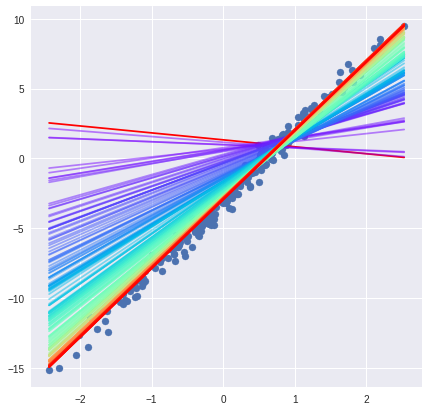

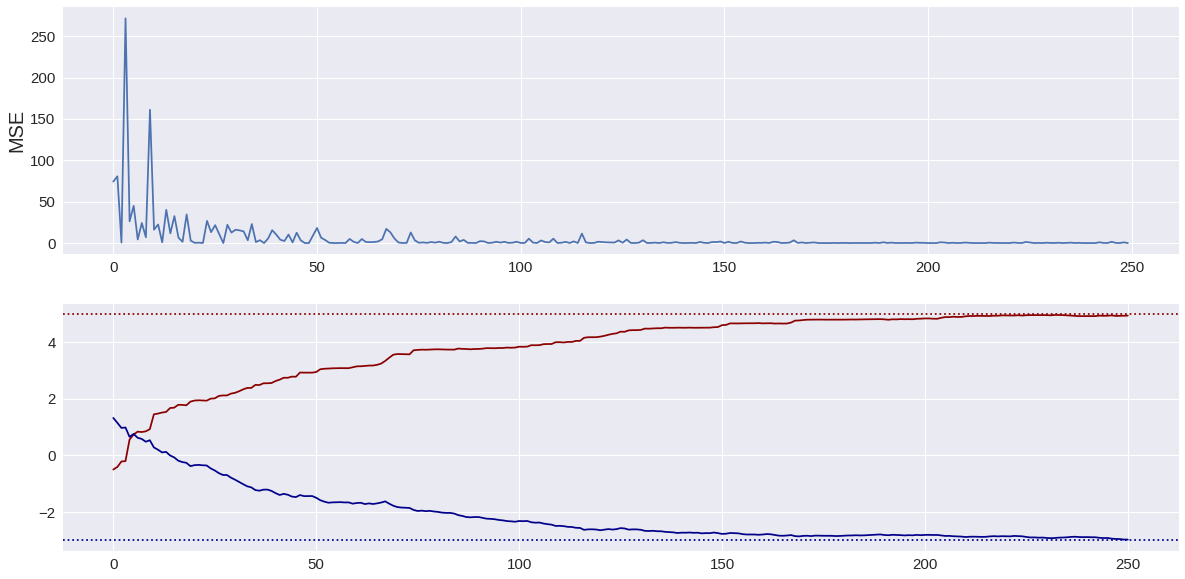

In [76]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.cm as cm

#Set random seed, plt style
np.random.seed(1)
plt.style.use("seaborn")

#Set params
N = 250
lr = 0.01
target_w, target_b = 5, -3
w, b = np.random.uniform(-3, 3, 2)

#Generate dataset
x_data = np.random.randn(N, )
y_data = x_data * target_w + target_b
y_data += 0.5 * np.random.randn(N, )

#Visualization
fig, ax = plt.subplots(figsize = (7, 7))
ax.scatter(x_data, y_data)

#Visualize initial model
x_range = np.array([x_data.min(), x_data.max()])
y_range = x_range * w + b
cmap = cm.get_cmap("rainbow", lut = N) #set cmap
ax.plot(x_range, y_range, color = cmap(999), alpha = 1.0)

#Train model and visualize updated models
J_track = list()
w_track, b_track = [w], [b]
for data_idx, (x, y) in enumerate(zip(x_data, y_data)):

    #Forward propagation
    pred = x * w + b
    J = (y - pred)**2
    J_track.append(J)

    #Jacobians
    dJ_dpred = -2 * (y - pred)
    dpred_dw, dpred_db = x, 1

    #Backpropagation
    dJ_dw = dJ_dpred * dpred_dw
    dJ_db = dJ_dpred * dpred_db

    #Parameter update
    w = w - lr * dJ_dw
    b = b - lr * dJ_db
    w_track.append(w)
    b_track.append(b)

    #Visualize updated model
    y_range = x_range * w + b
    ax.plot(x_range, y_range, color = cmap(data_idx), alpha = 0.5)

#Visualize results
fig, axes = plt.subplots(2, 1, figsize = (20, 10))
axes[0].plot(J_track)
axes[1].plot(w_track, color = "darkred")
axes[1].plot(b_track, color = "darkblue")

axes[0].set_ylabel("MSE", fontsize = 20)
axes[0].tick_params(labelsize = 15)

axes[1].axhline(y = target_w, color = "darkred", linestyle = ":")
axes[1].axhline(y = target_b, color = "darkblue", linestyle = ":")
axes[1].tick_params(labelsize = 15)

## 2. Linear Regression (N Features)

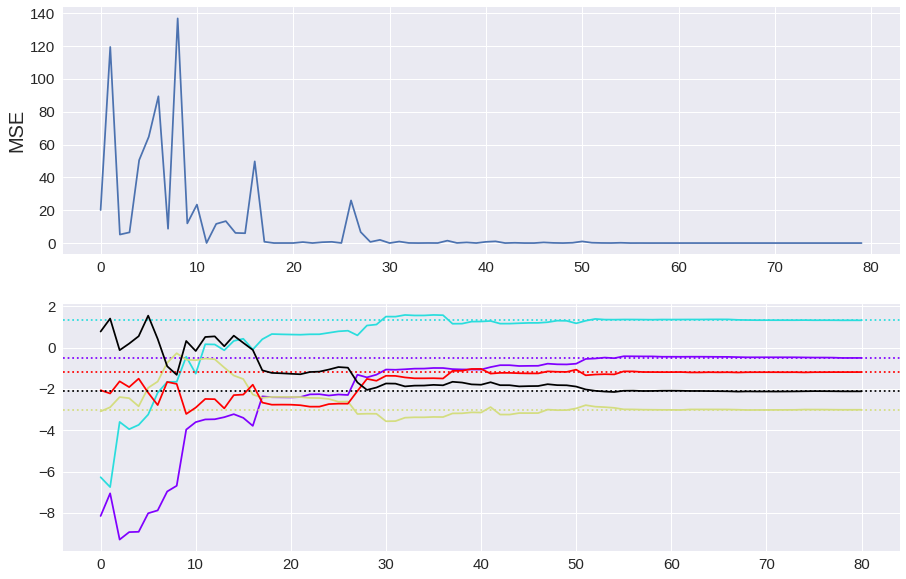

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.cm as cm

#Set random seed, plt style
np.random.seed(1)
plt.style.use("seaborn")

#Set params
N, n_feature = 80, 4
lr = 0.07
target_w_vec = np.random.uniform(-3, 3, (n_feature, 1)) #Column vector (n_feature, 1)
target_b = np.random.uniform(-3, 3, (1, ))              #(1, )
w_vec = np.random.uniform(-10, 10, (n_feature, 1))      #(n_feature, 1)
b = np.random.uniform(-10, 10, (1, 1))                  #(1, 1)

#Generate dataset
x_data = np.random.randn(N, n_feature)      #(N, n_feature)
y_data = x_data @ target_w_vec + target_b   #(N, 1)

#Train model and visualize updated models
J_track = list()
w_vec_track, b_track = [w_vec], [b]
for (x_vec, y) in zip(x_data, y_data):

    #Reshape
    x_vec = x_vec.reshape(n_feature, 1) #Convert to vector: (n_feature, ) -> (n_feature, 1)
    y = y.squeeze()             #Convert to scalar: (1, ) -> ()
    
    #Forward propagation
    x_vec_T = x_vec.reshape(1, -1)  #Convert to row vector: (n_feature, 1) -> (1, n_feature)
    pred = x_vec_T @ w_vec + b      #(1, 1)
    J = (y - pred) ** 2             #(1, 1)
    J_track.append(J.squeeze())     #Convert to scalar: (1, 1) -> ()

    #Jacobians
    dJ_dpred = -2 * (y - pred)  #(1, 1)
    dpred_dw = x_vec            #(n_feature, 1) 
    dpred_db = 1                #()

    #Backpropagation
    dJ_dw = dJ_dpred * dpred_dw #(n_feature, 1)
    dJ_db = dJ_dpred * dpred_db #(1, 1)

    #Parameter update
    w_vec = w_vec - lr * dJ_dw  #(n_feature, 1)
    b = b - lr * dJ_db          #(1, 1)

    w_vec_track.append(w_vec)
    b_track.append(b)

#Concatenating array (array -> <- array)
w_vec_track = np.hstack(w_vec_track)
b_track = np.hstack(b_track).flatten()

#Visualize results
fig, axes = plt.subplots(2, 1, figsize = (15, 10))
axes[0].plot(J_track)
axes[0].set_ylabel("MSE", fontsize = 20)
axes[0].tick_params(labelsize = 15)

cmap = cm.get_cmap("rainbow", lut = n_feature)
for w_vec_idx, (target_w, w) in enumerate(zip(target_w_vec, w_vec_track)):
    axes[1].axhline(y = target_w, color = cmap(w_vec_idx), linestyle = ":")
    axes[1].plot(w, color = cmap(w_vec_idx))
axes[1].axhline(y = target_b, color = "black", linestyle = ":")
axes[1].plot(b_track, color = "black")
axes[1].tick_params(labelsize = 15)